In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sc_experiments import *
import matplotlib.pyplot as plt 
import numpy as np

# Explore parts prediction

This noteboook explores simple unsupervised methods for battery part prediction. The goal is to identify battery parts, based on the supply chain network and the code for battery (850760).

In [3]:
sc = MultiTierSC()
G1 = sc.get_supply_chain([BATTERY], tiers=1, as_nx=True)
G2 = sc.get_supply_chain([BATTERY], tiers=2, as_nx=True)
G3 = sc.get_supply_chain([BATTERY], tiers=3, as_nx=True)

# get pagerank results
kwargs = {'personalization': {'%s_PRODUCT' % BATTERY: 1}}
pr_df1 = get_pagerank_ordering(G1, kwargs=kwargs)
pr_df2 = get_pagerank_ordering(G2, kwargs=kwargs)
pr_df3 = get_pagerank_ordering(G3, kwargs=kwargs)

# get PMI results
pmis = sc.compute_pmis(max_degree=3)
pmis[pmis.product_sold == BATTERY].head().round(4)

Found 4137 companies overall, 4137 companies with edges, 2720 products with edges, 50117 edges
Found 5658 companies overall, 5658 companies with edges, 2946 products with edges, 77113 edges
Found 7146 companies overall, 7146 companies with edges, 3135 products with edges, 96043 edges


,product_sold,product_bought,num_product_pair,p_product_pair,p_product_sold,p_product_bought,p_multiplied,pmi,pmi^2,pmi^3
415850,850760,003300,2,0.0001,0.1374,0.0006,0.0001,-0.1549,-9.7746,-19.3944
415851,850760,080450,1,0.0000,0.1374,0.0003,0.0000,-0.0943,-10.4072,-20.7200
415852,850760,081190,1,0.0000,0.1374,0.0000,0.0000,1.9852,-8.3277,-18.6406
415853,850760,090111,1,0.0000,0.1374,0.0003,0.0000,-0.0943,-10.4072,-20.7200
415854,850760,090121,2,0.0001,0.1374,0.0001,0.0000,1.2920,-8.3277,-17.9475


In [4]:
# should evaluate on standard set of products for fair comparison
# only consider products that are bought by battery maker
products = pmis[pmis.product_sold == BATTERY].product_bought.values
print('Keeping %d products' % len(products))
print('Found %d out of %d battery parts' % (np.sum(np.isin(BATTERY_PARTS, products)), len(BATTERY_PARTS)))
rand_ordering = products.copy()
np.random.seed(0)
np.random.shuffle(rand_ordering)
orderings = {'rand': rand_ordering}

Keeping 1726 products
Found 82 out of 85 battery parts


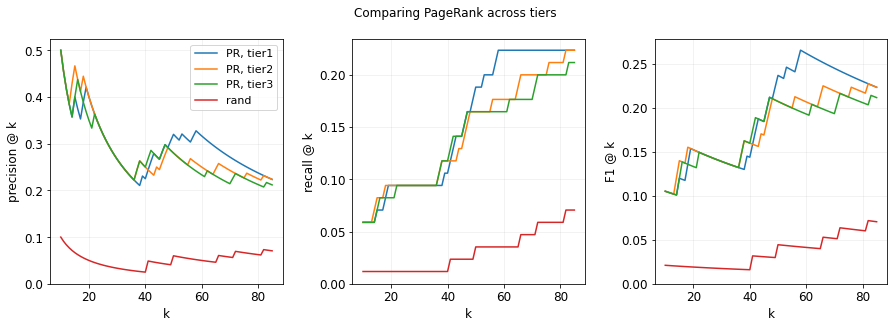

In [5]:
# compare results across PageRanks (undirected graph)
orderings['PR, tier1'] = pr_df1[(pr_df1.node_type == 'PRODUCT') & (pr_df1.node_name.isin(products))].node_name.values
orderings['PR, tier2'] = pr_df2[(pr_df2.node_type == 'PRODUCT') & (pr_df2.node_name.isin(products))].node_name.values
orderings['PR, tier3'] = pr_df3[(pr_df3.node_type == 'PRODUCT') & (pr_df3.node_name.isin(products))].node_name.values
labels = ['PR, tier1', 'PR, tier2', 'PR, tier3', 'rand']
compare_orderings_across_k(orderings, labels, title='Comparing PageRank across tiers')

Found 4137 companies overall, 4137 companies with edges, 2720 products with edges, 50117 edges
Found 4137 companies overall, 4137 companies with edges, 2720 products with edges, 50117 edges


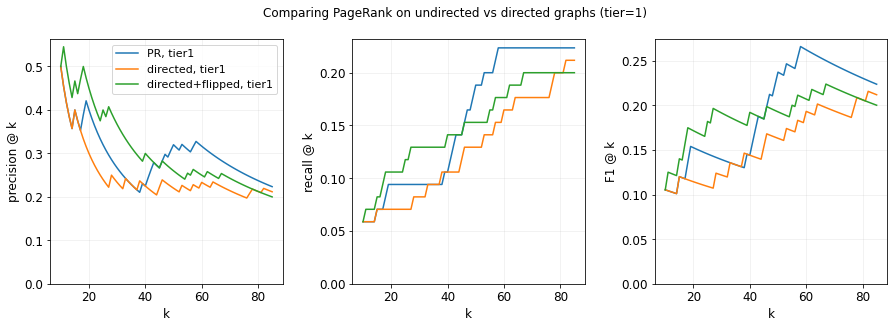

In [6]:
# try directed graph
num_tiers = 1
G_dir = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True})
pr_df_dir = get_pagerank_ordering(G_dir, kwargs=kwargs)
orderings[f'directed, tier{num_tiers}'] = pr_df_dir[(pr_df_dir.node_type == 'PRODUCT') & (pr_df_dir.node_name.isin(products))].node_name.values

G_dir_flip = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True, 'flip_direction':True})
pr_df_dir_flip = get_pagerank_ordering(G_dir_flip, kwargs=kwargs)
orderings[f'directed+flipped, tier{num_tiers}'] = pr_df_dir_flip[(pr_df_dir_flip.node_type == 'PRODUCT') & (pr_df_dir_flip.node_name.isin(products))].node_name.values

labels = [f'PR, tier{num_tiers}', f'directed, tier{num_tiers}', f'directed+flipped, tier{num_tiers}']
compare_orderings_across_k(orderings, labels, title=f'Comparing PageRank on undirected vs directed graphs (tier={num_tiers})')

Found 5658 companies overall, 5658 companies with edges, 2946 products with edges, 77113 edges
Found 5658 companies overall, 5658 companies with edges, 2946 products with edges, 77113 edges


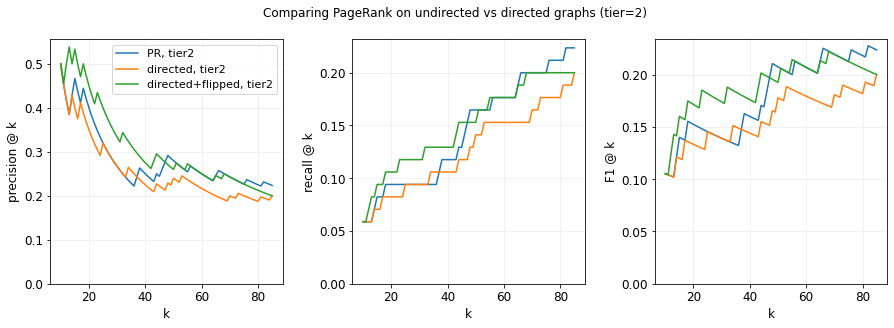

In [7]:
# try directed graph
num_tiers = 2
G_dir = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True})
pr_df_dir = get_pagerank_ordering(G_dir, kwargs=kwargs)
orderings[f'directed, tier{num_tiers}'] = pr_df_dir[(pr_df_dir.node_type == 'PRODUCT') & (pr_df_dir.node_name.isin(products))].node_name.values

G_dir_flip = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True, 'flip_direction':True})
pr_df_dir_flip = get_pagerank_ordering(G_dir_flip, kwargs=kwargs)
orderings[f'directed+flipped, tier{num_tiers}'] = pr_df_dir_flip[(pr_df_dir_flip.node_type == 'PRODUCT') & (pr_df_dir_flip.node_name.isin(products))].node_name.values

labels = [f'PR, tier{num_tiers}', f'directed, tier{num_tiers}', f'directed+flipped, tier{num_tiers}']
compare_orderings_across_k(orderings, labels, title=f'Comparing PageRank on undirected vs directed graphs (tier={num_tiers})')

Found 7146 companies overall, 7146 companies with edges, 3135 products with edges, 96043 edges
Found 7146 companies overall, 7146 companies with edges, 3135 products with edges, 96043 edges


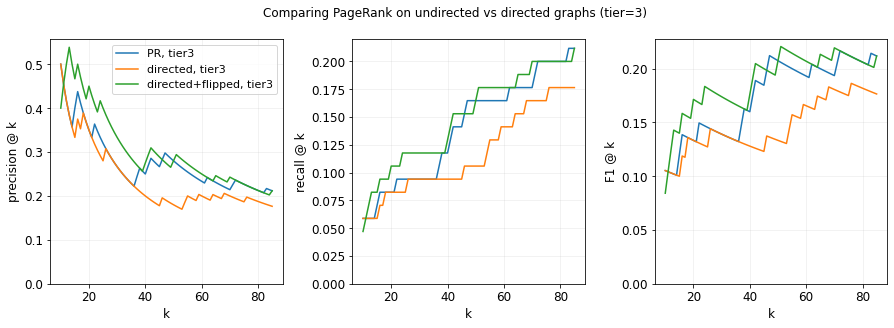

In [8]:
# try directed graph
num_tiers = 3
G_dir = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True})
pr_df_dir = get_pagerank_ordering(G_dir, kwargs=kwargs)
orderings[f'directed, tier{num_tiers}'] = pr_df_dir[(pr_df_dir.node_type == 'PRODUCT') & (pr_df_dir.node_name.isin(products))].node_name.values

G_dir_flip = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True, 'flip_direction':True})
pr_df_dir_flip = get_pagerank_ordering(G_dir_flip, kwargs=kwargs)
orderings[f'directed+flipped, tier{num_tiers}'] = pr_df_dir_flip[(pr_df_dir_flip.node_type == 'PRODUCT') & (pr_df_dir_flip.node_name.isin(products))].node_name.values

labels = [f'PR, tier{num_tiers}', f'directed, tier{num_tiers}', f'directed+flipped, tier{num_tiers}']
compare_orderings_across_k(orderings, labels, title=f'Comparing PageRank on undirected vs directed graphs (tier={num_tiers})')

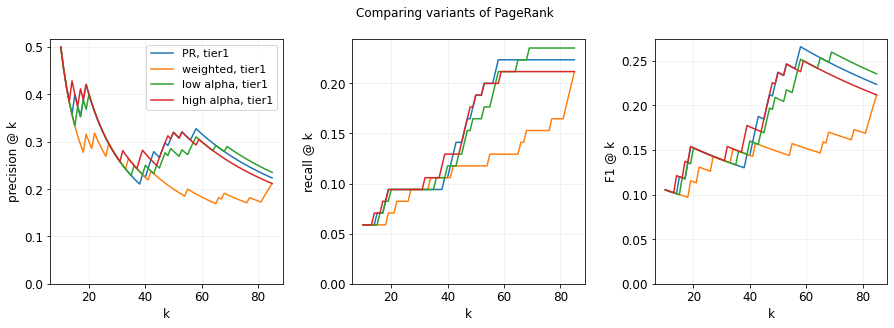

In [9]:
# try variants of PageRank
# weighted PageRank using edge_attr (bill_count) on edges
kwargs = {'personalization': {'%s_PRODUCT' % BATTERY: 1}, 'weight': 'edge_attr'}
pr_df_weighted = get_pagerank_ordering(G1, kwargs=kwargs)
orderings['weighted, tier1'] = pr_df_weighted[(pr_df_weighted.node_type == 'PRODUCT') & (pr_df_weighted.node_name.isin(products))].node_name.values

# lower alpha parameter (shorter random walks)
kwargs = {'personalization': {'%s_PRODUCT' % BATTERY: 1}, 'alpha': 0.7}
pr_df_low_alpha = get_pagerank_ordering(G1, kwargs=kwargs)
orderings['low alpha, tier1'] = pr_df_low_alpha[(pr_df_low_alpha.node_type == 'PRODUCT') & (pr_df_low_alpha.node_name.isin(products))].node_name.values

# higher alpha parameter (longer random walks)
kwargs = {'personalization': {'%s_PRODUCT' % BATTERY: 1}, 'alpha': 0.95}
pr_df_high_alpha = get_pagerank_ordering(G1, kwargs=kwargs)
orderings['high alpha, tier1'] = pr_df_high_alpha[(pr_df_high_alpha.node_type == 'PRODUCT') & (pr_df_high_alpha.node_name.isin(products))].node_name.values

labels = ['PR, tier1', 'weighted, tier1', 'low alpha, tier1', 'high alpha, tier1']
compare_orderings_across_k(orderings, labels, 'Comparing variants of PageRank')

/home/serina/src/sc_experiments.py:207: RuntimeWarning: invalid value encountered in true_divide
  f1_vec = 2 * (prec_vec * rec_vec) / (prec_vec + rec_vec)


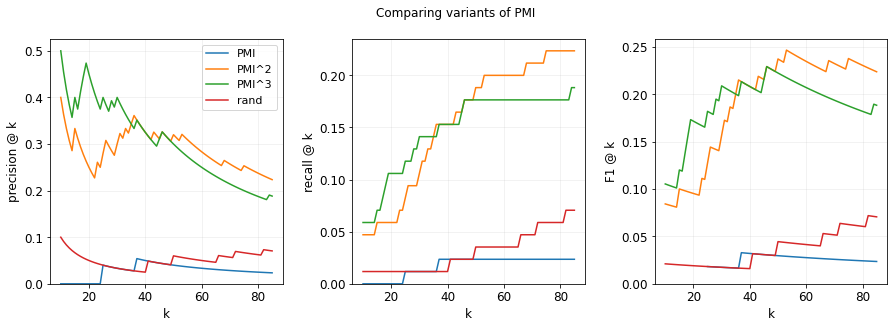

In [10]:
# compare results across PMIs
orderings['PMI'] = pmis[pmis.product_sold == BATTERY].sort_values('pmi', ascending=False).product_bought.values
orderings['PMI^2'] = pmis[pmis.product_sold == BATTERY].sort_values('pmi^2', ascending=False).product_bought.values
orderings['PMI^3'] = pmis[pmis.product_sold == BATTERY].sort_values('pmi^3', ascending=False).product_bought.values

labels = ['PMI', 'PMI^2', 'PMI^3', 'rand']
compare_orderings_across_k(orderings, labels, 'Comparing variants of PMI')

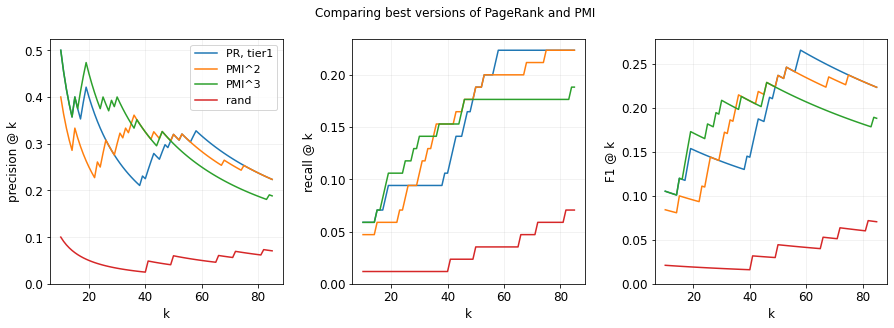

In [11]:
# compare best PageRank and best PMIs
labels = ['PR, tier1', 'PMI^2', 'PMI^3', 'rand']
compare_orderings_across_k(orderings, labels, 'Comparing best versions of PageRank and PMI')

In [12]:
# evaluate similarity in orderings
# spearmans are low, but overlap in top 100 is probably a better metric since we only care about top
from scipy.stats import spearmanr

labels = list(orderings.keys())
for i in range(len(labels)):
    if i < (len(labels)-1):
        for j in range(i+1, len(labels)):
            l_i, l_j = labels[i], labels[j]
            if l_i != 'rand' and l_j != 'rand':
                ord_i = orderings[l_i]
                ord_j = orderings[l_j]
                r, p = spearmanr(ord_i, ord_j)
                overlap = len(set(ord_i[:100]).intersection(set(ord_j[:100])))
                print('%s vs %s -> spearmanr=%.4f (p=%.4f), overlap in top 100: %d' % (
                    l_i, l_j, r, p, overlap))
        print()


PR, tier1 vs PR, tier2 -> spearmanr=0.0890 (p=0.0002), overlap in top 100: 96
PR, tier1 vs PR, tier3 -> spearmanr=0.1192 (p=0.0000), overlap in top 100: 94
PR, tier1 vs directed, tier1 -> spearmanr=0.0967 (p=0.0001), overlap in top 100: 62
PR, tier1 vs directed+flipped, tier1 -> spearmanr=0.0792 (p=0.0010), overlap in top 100: 64
PR, tier1 vs directed, tier2 -> spearmanr=0.1515 (p=0.0000), overlap in top 100: 62
PR, tier1 vs directed+flipped, tier2 -> spearmanr=0.0432 (p=0.0728), overlap in top 100: 65
PR, tier1 vs directed, tier3 -> spearmanr=0.1274 (p=0.0000), overlap in top 100: 61
PR, tier1 vs directed+flipped, tier3 -> spearmanr=0.0873 (p=0.0003), overlap in top 100: 63
PR, tier1 vs weighted, tier1 -> spearmanr=0.0845 (p=0.0004), overlap in top 100: 63
PR, tier1 vs low alpha, tier1 -> spearmanr=0.1353 (p=0.0000), overlap in top 100: 95
PR, tier1 vs high alpha, tier1 -> spearmanr=0.1001 (p=0.0000), overlap in top 100: 95
PR, tier1 vs PMI -> spearmanr=-0.0049 (p=0.8372), overlap in

In [13]:
# top 30 from PageRank, tier1
pr_ordering = pr_df1[(pr_df1.node_type == 'PRODUCT') & (pr_df1.node_name.isin(products))].copy()
print(len(pr_ordering))
pr_ordering['label'] = pr_ordering.node_name.isin(BATTERY_PARTS)
pr_ordering.head(30)

1726


,node_name,node_type,label,pr,rank
1,850760,PRODUCT,True,0.449487,0
34,850440,PRODUCT,True,0.001297,13
21,392690,PRODUCT,True,0.001111,20
175,854442,PRODUCT,True,0.000875,31
169,732690,PRODUCT,True,0.000743,37
224,853690,PRODUCT,False,0.000668,43
220,851762,PRODUCT,False,0.000668,44
287,851770,PRODUCT,False,0.000573,56
239,731815,PRODUCT,False,0.000571,57
37,853650,PRODUCT,False,0.000546,60


In [14]:
# top 30 from PMI
pr_ordering = pmis[pmis.product_sold == BATTERY].sort_values('pmi^2', ascending=False).copy()
print(len(pr_ordering))
pr_ordering['label'] = pr_ordering.product_bought.isin(BATTERY_PARTS)
pr_ordering.head(30)[['product_bought', 'label', 'p_product_bought', 'pmi', 'pmi^2', 'pmi^3']]

1726


,product_bought,label,p_product_bought,pmi,pmi^2,pmi^3
417106,850760,True,0.140082,-1.024663,-6.000003,-10.975344
417160,851770,False,0.009230,0.164193,-6.342022,-12.848238
417167,851829,False,0.005545,0.393519,-6.392999,-13.179517
417013,847330,False,0.009197,0.098804,-6.476404,-13.051613
417283,854231,False,0.007902,0.123799,-6.578161,-13.280121
417090,850440,True,0.023308,-0.441647,-6.627391,-12.813135
417284,854232,False,0.002557,0.637079,-6.680067,-13.997213
417296,854442,True,0.024138,-0.492901,-6.694905,-12.896909
417067,850110,True,0.008832,-0.014825,-6.744185,-13.473544
417193,852580,False,0.007072,0.089596,-6.757547,-13.604689
